Displaying: image4_part_3.png


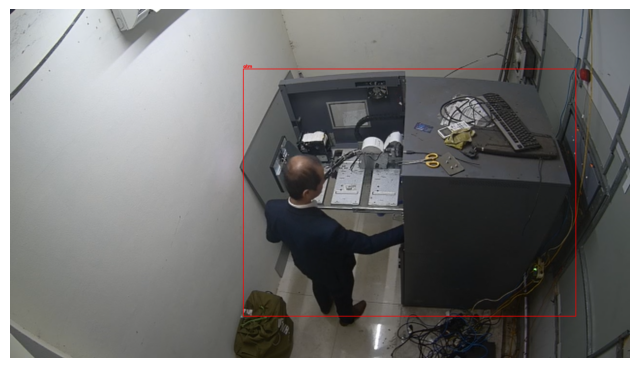

Displaying: image11_part_3.png


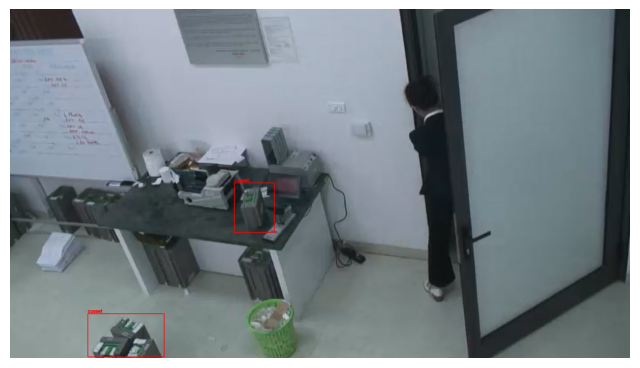

Displaying: image_part_3.png


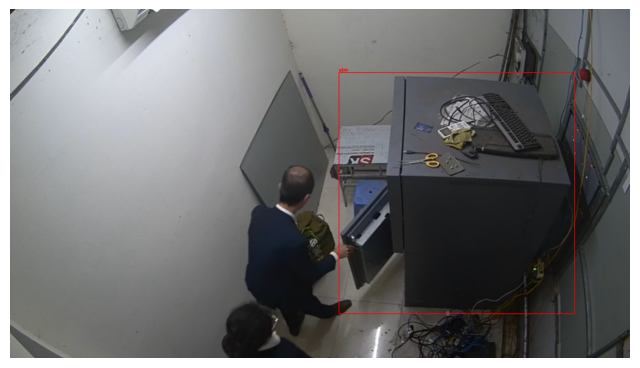

Displaying: image3_part_3.png


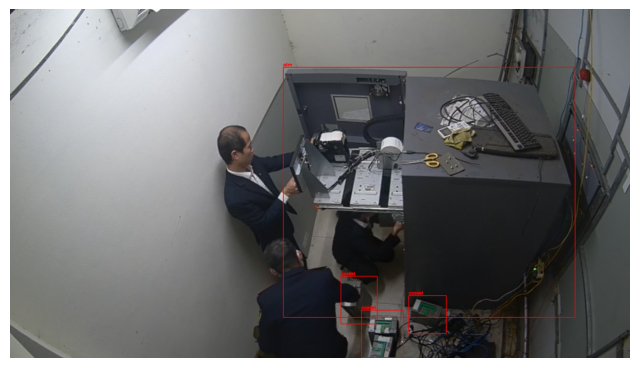

Displaying: image9_part_3.png


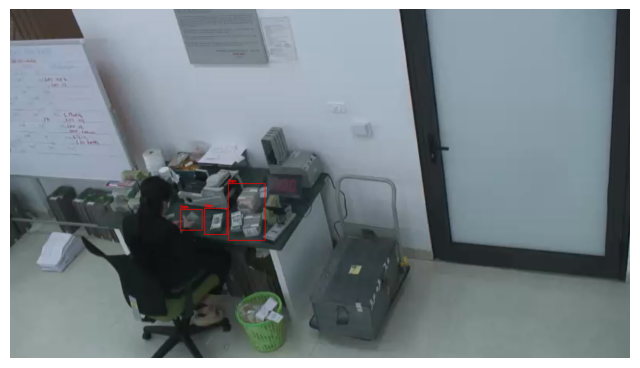

Displaying: image6_part_3.png


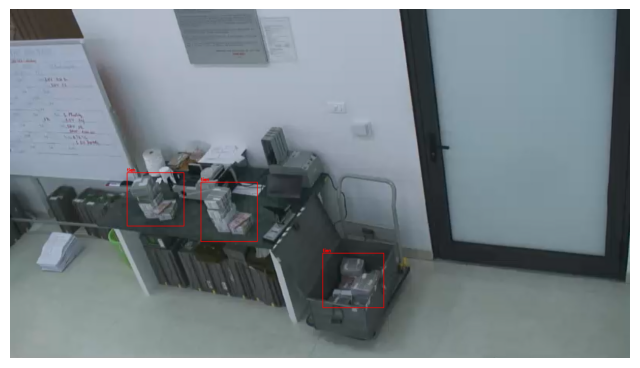

Displaying: image13_part_3.png


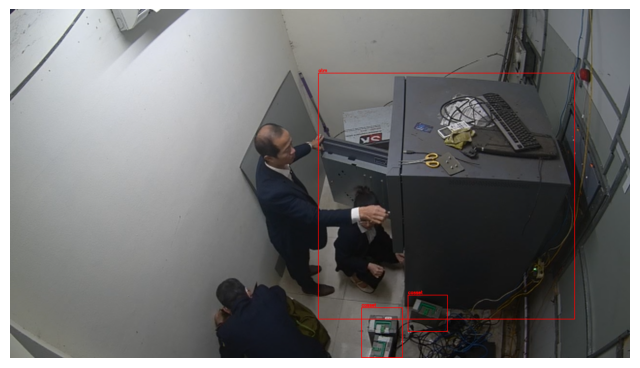

Displaying: image1_part_3.png


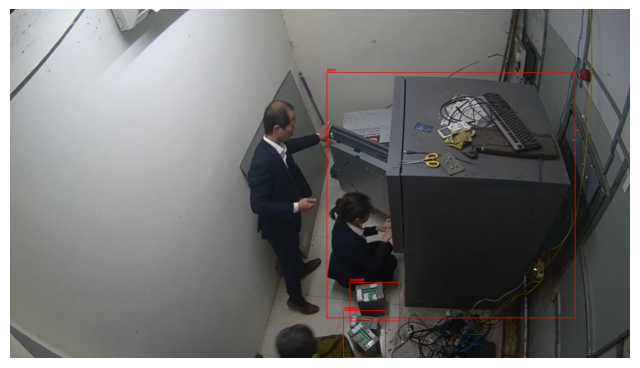

Displaying: image8_part_3.png


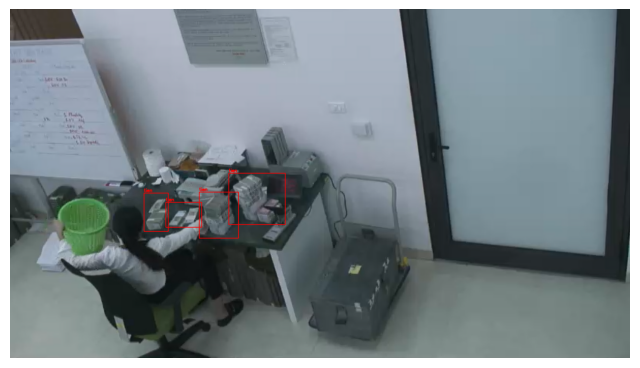

Displaying: image5_part_3.png


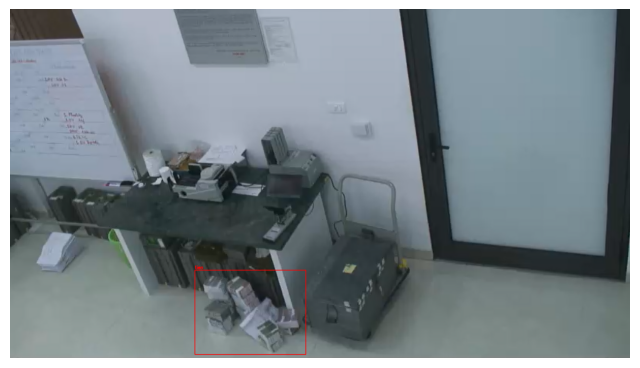

Displaying: image12_part_3.png


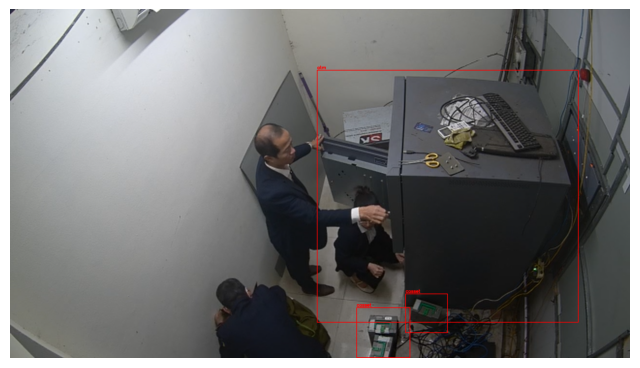

Displaying: image10_part_3.png


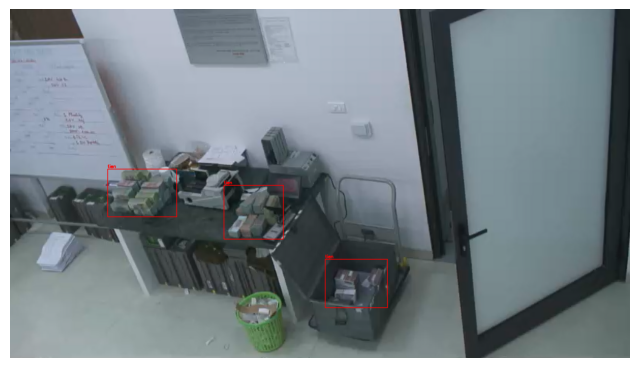

Displaying: image7_part_3.png


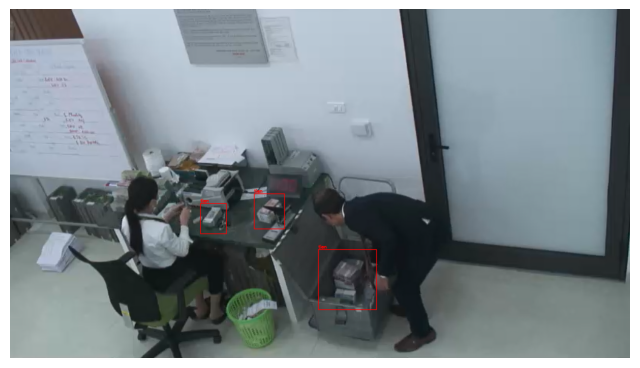

Displaying: image2_part_3.png


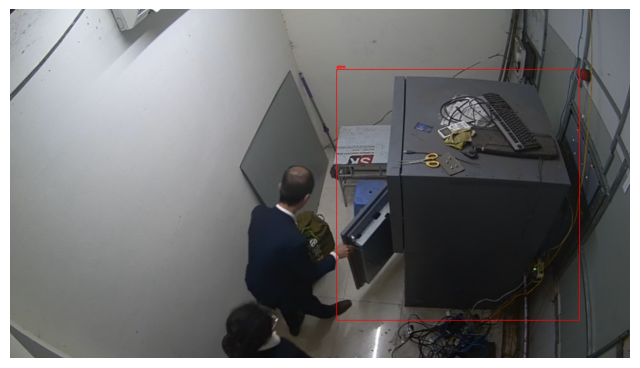

In [2]:
%matplotlib inline
import os
import cv2
import matplotlib.pyplot as plt

# Define paths
yolo_labels_dir = "yolo_labels"
images_dir = "."  # Assuming images are in the current directory

# Define class mapping
class_mapping = {0: "tien", 1: "atm", 2: "casset"}

# Function to plot bounding boxes
def plot_bounding_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    
    with open(label_path, "r") as f:
        labels = f.readlines()
    
    for label in labels:
        parts = label.strip().split()
        if len(parts) != 5:
            continue
        class_id, x_center, y_center, w, h = map(float, parts)
        x_center, y_center, w, h = (
            x_center * width,
            y_center * height,
            w * width,
            h * height,
        )
        x_min = int(x_center - w / 2)
        y_min = int(y_center - h / 2)
        x_max = int(x_center + w / 2)
        y_max = int(y_center + h / 2)
        class_name = class_mapping.get(int(class_id), "Unknown")
        
        # Draw rectangle and label
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cv2.putText(image, class_name, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Loop through YOLO label files and display corresponding images
for label_file in os.listdir(yolo_labels_dir):
    if label_file.endswith(".txt"):
        image_file = os.path.splitext(label_file)[0] + ".png"  # Adjust if images have a different extension
        image_path = os.path.join(images_dir, image_file)
        label_path = os.path.join(yolo_labels_dir, label_file)
        if os.path.exists(image_path):
            print(f"Displaying: {image_file}")
            plot_bounding_boxes(image_path, label_path)
        else:
            print(f"Warning: Corresponding image {image_path} not found!")
